## TABLE OF CONTENTS:
1.Flowchart-the flow of diagram for working

      i. Change userpin
      ii. Check Balance
     iii. Deposit Fund
      iv. Withdraw Fund
       v. Transfer Fund
2.Coding

3.Output of the code


## INTODUCTION OF PROJECT

The project consists of designing an ATM that enables user to perform various functions such as changing userpin,check existing balance,deposit fund,withdraw fund and transfer fund.

The project consist of 5 options to perform
## 1.change user pin-
for the first time accessing the ATM the user needs to set a valid user pin.This is achieved by validating the userpin input by user then initializing it to be the userpin.If the userpin entered is not valid like if the user inputs a non integer value the code handles that error also and does not crashes.This is achieved by the following functions:

        i. input__userpin()
       ii. valid_userpin_4digit(userpin)
      iii. initialize_userpin(userpin)

FOR THE REST OF THE OPTIONS WE HAVE DESIGNED AN ATM CLASS THAT PACKS REST OF THE FUNCTIONS TOGETHER
## 2.Check Balance-
If the choice made by the user is 2 then the program checks for the amount in the savings balance.Initially it is set to zero.The user first needs to deposit fund to see amount in his savings balance .

## 3.Deposit Fund-
If the user needs to deposit fund he must choose the option 3. The amount to be deposited gets added in the savings balance

## 4.Withdraw Fund-
If the user needs to withdraw fund he must choose option 4.The fund withdrawn is deducted from the savings balance.

## 5.Transfer Fund-
For tranfering the fund from checking balance to savings balance the user makes a choice of option 5.The checking balance is initially assigned with an amount of 50000 in this code.

## 6.Exit
To exit the code user enters choice 6.
If the user enters a choice other than the given choices the program terminates

The choices to be entered by the user is asked in the main menu
To continue using the ATM options the code asks if we want to continue or not.
The program terminates if the user chooses not to continue by pressing 'n'.

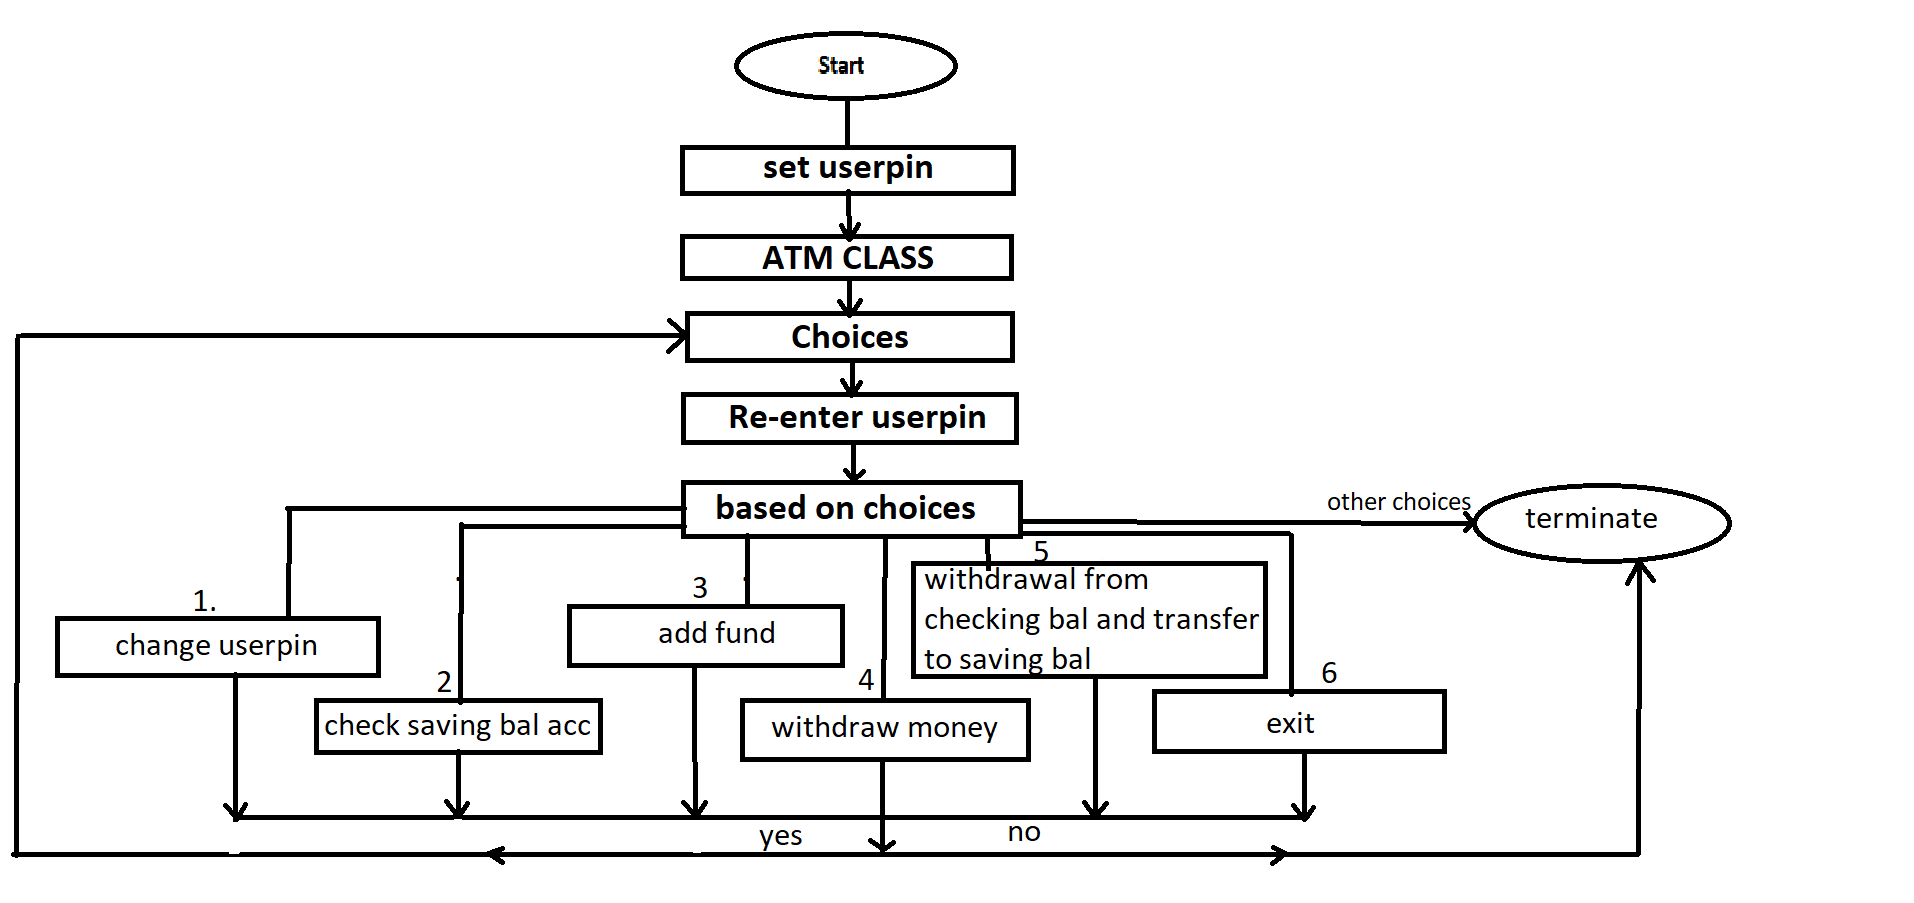

## ATM class diagram
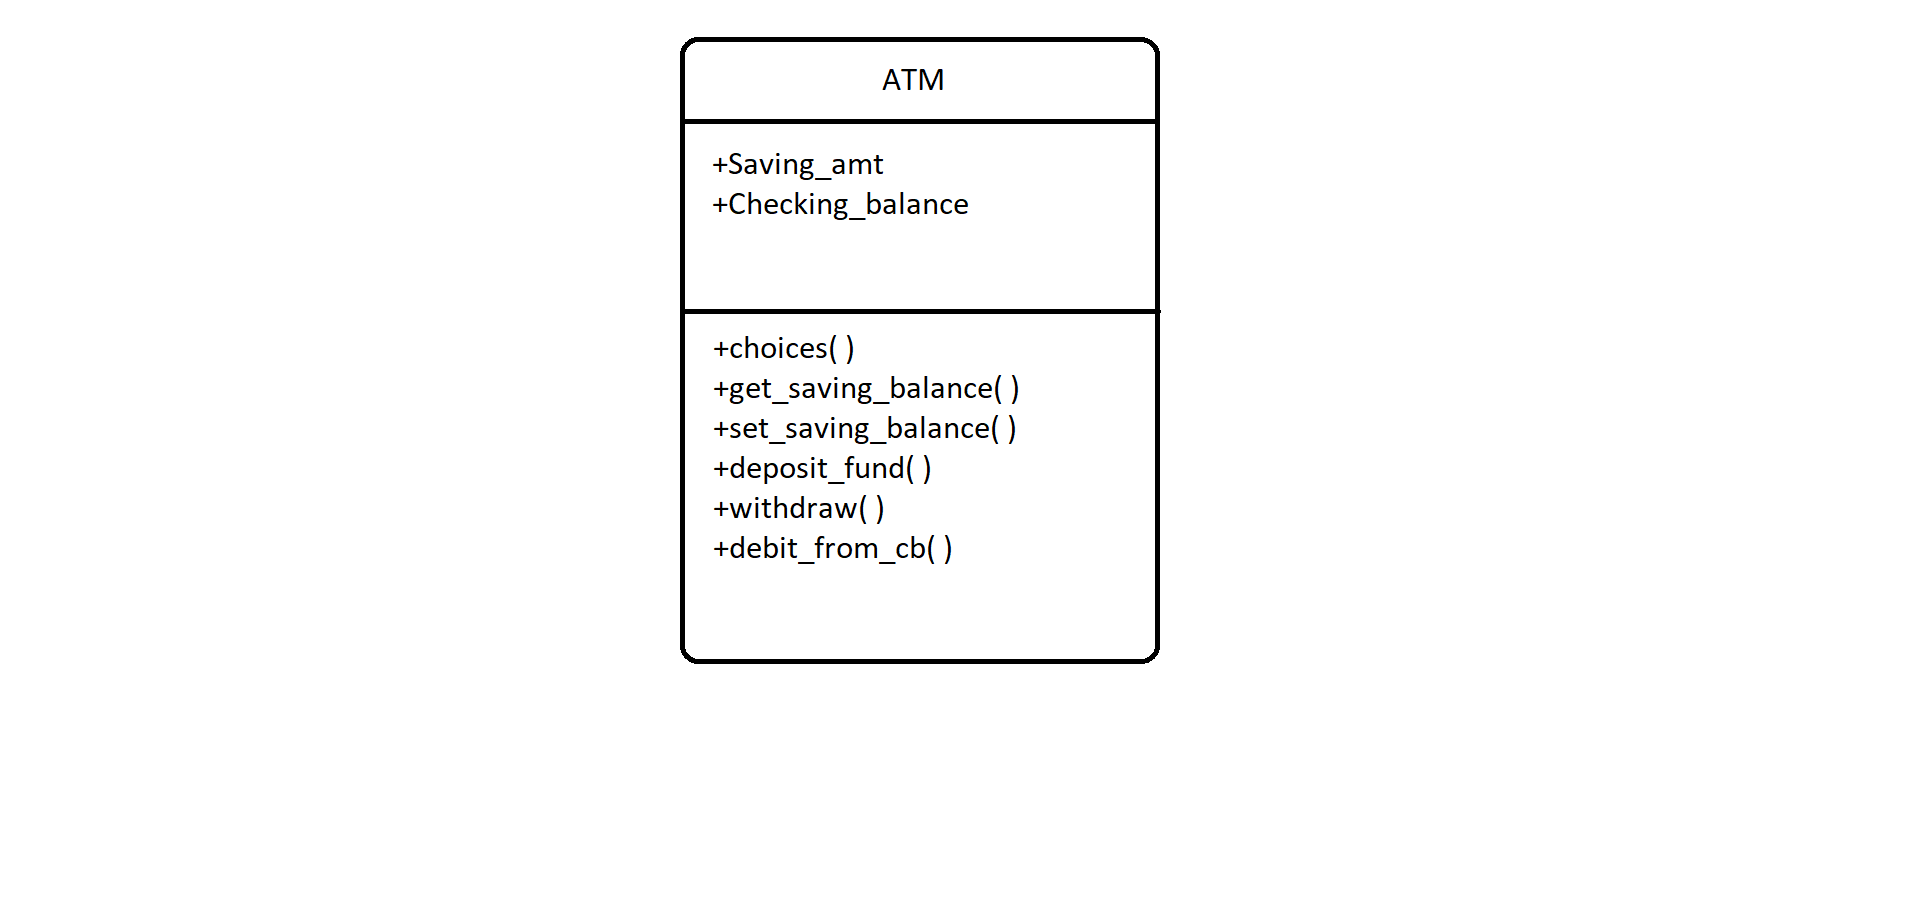

In [2]:
print("__________________________________________________________________")
print("                                                              ")
print(" \tYou are accessing for first time\t \nenter 0 as a previous userpin to set a new userpin ")
print("___________________________________________________________________")
userpin = 0  #initial userpin assigned as 0


class ATM:  # ATM class to perform all banking operations
    saving_amt = 0
    checking_balance = 50000

    def choices(self):
        ch = int(input('''___enter choices in range 1 to 6 both inclusive___
    1.to change userpin
    2.to check saving balance and print balance
    3.to deposit funds from user and print saving bal after deposit
    4.to withdraw funds from saving bal account and print bal after withdrawal
    5.to transfer funds from checking bal to saving bal
    6.to exit\n'''))
        return ch

    # to get amount in savings balance initially it is 0
    def get_saving_balance(self):
        return ATM.saving_amt

    def set_saving_balance(self, fund=0, withdraw=0, credit=0):  # update saving balance
        ATM.saving_amt = ATM.saving_amt+fund-withdraw+credit

    def deposit_fund(self):  # function to deposit fund in saving balance
        fund = float(input("Enter fund to deposit : "))
        self.set_saving_balance(fund, 0, 0)

    def withdraw(self):  # function to withdraw fund and update savings balance
        withdrawal = float(input("Enter withdrawal amount : "))
        if (ATM.saving_amt < withdrawal):
            print("\n *INSUFFICIENT BALANCE*\n ")
        else:
            self.set_saving_balance(0, withdrawal, 0)

    # function to debit from checking balance and update saving balance
    def debit_from_cb(self):
        debit = float(input("enter amount to debit from checking balance"))
        if debit > ATM.checking_balance:
            return -1
        else:
            ATM.checking_balance -= debit
            self.set_saving_balance(0, 0, debit)
            return ATM.checking_balance


def valid_userpin_4digit(u1):  # validating userpin if it has 4 digits or not
    if (len(list(str(u1))) == 4):
        return True
    else:
        print("\n*entered user pin did not have 4 digits*")
        return False


def input_userpin():  # getting input from user
    try:
        u1 = int(input("Enter your 4 digit user pin: "))
        valid = valid_userpin_4digit(u1)
        if valid and u1 == userpin:
            u2 = int(input("Enter again 4 digit userpin: "))
            if (u1 == u2):
                print("\n--Userpin matched--\n*Accesing you account*")
                return True
            else:
                print("--Oops!!! Userpin did not matched\n")
                return False
        elif valid:
            print("\n*userpin did not matched with the saved userpin*")
    except ValueError:
        print("enter an integer value\n")


def initialize_userpin(up):  # changing the previous userpin
    try:  #with the try except block handling the case if the user enters a non numeric value
        u1 = int(input("enter previous userpin : "))
        if (u1 == up):
            new_userpin = int(input("enter new userpin : "))
            valid = valid_userpin_4digit(new_userpin)
            if valid:
                userpin = change(new_userpin)
                print("*userpin changed*\n")
                return userpin
            else:
                print("*invalid userpin-previous userpin in database*")
                return up
        else:
            print("\n*wrong userpin-previous userpin in database*")
            return up
    except:
        print("enter an integer value\n")
        return up


def change(new_userpin):
    return new_userpin


def get_condition(condition):  # to continue using ATM enter y or n
    if condition == 'Y' or condition == 'y':
        return True
    if condition == 'N' or condition == 'n':
        return False
    else:
        print("*Invalid choice*")
        condition = input("to continue enter Y for yes or N for no : ")
        return get_condition(condition)


# for the first time we need to set userpin
userpin = initialize_userpin(userpin)
while (True):
    if userpin == 0:
        print("--you did not changed your default userpin--")
        userpin = initialize_userpin(userpin)
        cond = input("Y for yes or N for no : ")
        to_continue = get_condition(cond)
        if not to_continue:
            break
        else:
            continue
    ob = ATM()
    try:  # using try block if the user enters a string value in case
        ch = ob.choices()
        if (ch >= 1 and ch < 6):
            valid = input_userpin()
            if valid:
                if (ch == 1):  # to change userpin
                    userpin = initialize_userpin(userpin)

                if (ch == 2):
                    saving_amt = ob.get_saving_balance()
                    print("Saving balanace amount = ", saving_amt)

                if (ch == 3):
                    ob.deposit_fund()
                    saving_amt = ob.get_saving_balance()
                    print("saving balance amount = ", saving_amt)

                if (ch == 4):
                    ob.withdraw()
                    saving_amt = ob.get_saving_balance()
                    if saving_amt < 0:
                        print(
                            "withdrawal amount is greater than amount in saving balance : \n")
                    else:
                        print("saving balance amount = ", saving_amt)

                if (ch == 5):
                    checking_bal_amt = ob.debit_from_cb()
                    saving_amt = ob.get_saving_balance()

                    if checking_bal_amt == -1:
                        print(
                            "**can not debit as amount in checking balance is low**")
                    else:
                        print("Saving balanace amount = ", saving_amt)
                        print("Checking balanace amount = ", checking_bal_amt)

            else:
                print("*invalid userpin*")

        elif ch == 6:
            break
        else:
            print("**INVALID CHOICE**")
            break
    except:
        print("\n *ENTER AN INTEGER VALUE* ")

    cond = input("Y for yes or N for no : ")
    to_continue = get_condition(cond)
    if not to_continue:
        break
    else:
        continue


__________________________________________________________________
                                                              
 	You are accessing for first time	 
enter 0 as a previous userpin to set a new userpin 
___________________________________________________________________
enter previous userpin : 0
enter new userpin : 12

*entered user pin did not have 4 digits*
*invalid userpin-previous userpin in database*
--you did not changed your default userpin--
enter previous userpin : 0
enter new userpin : 8520
*userpin changed*

Y for yes or N for no : y
___enter choices in range 1 to 6 both inclusive___
    1.to change userpin
    2.to check saving balance and print balance
    3.to deposit funds from user and print saving bal after deposit
    4.to withdraw funds from saving bal account and print bal after withdrawal
    5.to transfer funds from checking bal to saving bal
    6.to exit
1
Enter your 4 digit user pin: 8520
Enter again 4 digit userpin: 8452
--Oops!!! Userpin did 

## OUTPUT

__________________________________________________________________
                                                              
 	You are accessing for first time	 
enter 0 as a previous userpin to set a new userpin 
___________________________________________________________________
enter previous userpin : 0
## Entering an invalid userpin
enter new userpin : 12

*entered user pin did not have 4 digits*

*invalid userpin-previous userpin in database*

--you did not changed your default userpin--

## Entering a valid userpin this time
enter previous userpin : 0

enter new userpin : 8520

*userpin changed*

Y for yes or N for no : y

## Entering choice 1 and an invalid userpin
___enter choices in range 1 to 6 both inclusive___

1.to change userpin

2.to check saving balance and print balance

3.to deposit funds from user and print saving bal after deposit

4.to withdraw funds from saving bal account and print bal after withdrawal

5.to transfer funds from checking bal to saving bal

6.to exit

1

Enter your 4 digit user pin: 8520


Enter again 4 digit userpin: 8452

--Oops!!! Userpin did not matched

*invalid userpin*

Y for yes or N for no : y

## Entering a valid userpin and changing previous userpin
___enter choices in range 1 to 6 both inclusive___

1.to change userpin

2.to check saving balance and print balance

3.to deposit funds from user and print saving bal after deposit

4.to withdraw funds from saving bal account and print bal after withdrawal

5.to transfer funds from checking bal to saving bal

6.to exit

1

Enter your 4 digit user pin: 8520

Enter again 4 digit userpin: 8520

--Userpin matched--

*Accesing you account*

enter previous userpin : 8520

enter new userpin : 1234

*userpin changed*

## Entering choice 2 to see savings balance
Y for yes or N for no : y

___enter choices in range 1 to 6 both inclusive___

1.to change userpin

2.to check saving balance and print balance

3.to deposit funds from user and print saving bal after deposit

4.to withdraw funds from saving bal account and print bal after withdrawal

5.to transfer funds from checking bal to saving bal

6.to exit

2

Enter your 4 digit user pin: 1234

Enter again 4 digit userpin: 12345

--Oops!!! Userpin did not matched

*invalid userpin*

Y for yes or N for no : y

___enter choices in range 1 to 6 both inclusive___

1.to change userpin

2.to check saving balance and print balance

3.to deposit funds from user and print saving bal after deposit

4.to withdraw funds from saving bal account and print bal after withdrawal

5.to transfer funds from checking bal to saving bal

6.to exit

2

Enter your 4 digit user pin: 1234

Enter again 4 digit userpin: 1234


--Userpin matched--

*Accesing you account*

Saving balanace amount =  0

## Entering choice 3 to deposit fund
Y for yes or N for no : y

___enter choices in range 1 to 6 both inclusive___

1.to change userpin

2.to check saving balance and print balance

3.to deposit funds from user and print saving bal after deposit

4.to withdraw funds from saving bal account and print bal after withdrawal

5.to transfer funds from checking bal to saving bal

6.to exit

3

Enter your 4 digit user pin: 1234

Enter again 4 digit userpin: 1234



--Userpin matched--

*Accesing you account*

Enter fund to deposit : 1500

saving balance amount =  1500.0

Y for yes or N for no : y
## Entering choice 4 to withdraw amount 
___enter choices in range 1 to 6 both inclusive___

1.to change userpin

2.to check saving balance and print balance

3.to deposit funds from user and print saving bal after deposit

4.to withdraw funds from saving bal account and print bal after withdrawal

5.to transfer funds from checking bal to saving bal

6.to exit

4

Enter your 4 digit user pin: 1234

Enter again 4 digit userpin: 1234


--Userpin matched--

*Accesing you account*

Enter withdrawal amount : 500

saving balance amount =  1000.0
## Entering choice 5 to tranfer fund from checking balance to savings balance
Y for yes or N for no : y

___enter choices in range 1 to 6 both inclusive___

1.to change userpin

2.to check saving balance and print balance

3.to deposit funds from user and print saving bal after deposit

4.to withdraw funds from saving bal account and print bal after withdrawal

5.to transfer funds from checking bal to saving bal

6.to exit

5

Enter your 4 digit user pin: 1234

Enter again 4 digit userpin: 1234



--Userpin matched--

*Accesing you account*

enter amount to debit from checking balance200

Saving balanace amount =  1200.0

Checking balanace amount =  49800.0

Y for yes or N for no : y
## Entering a non integer value as choice (The program instead of crashing asks the user to enter an integer value)
___enter choices in range 1 to 6 both inclusive___

1.to change userpin

2.to check saving balance and print balance

3.to deposit funds from user and print saving bal after deposit

4.to withdraw funds from saving bal account and print bal after withdrawal

5.to transfer funds from checking bal to saving bal

6.to exit

alphabet



*ENTER AN INTEGER VALUE* 

Y for yes or N for no : y
## Entering a non numeric userpin
___enter choices in range 1 to 6 both inclusive___

1.to change userpin

2.to check saving balance and print balance

3.to deposit funds from user and print saving bal after deposit

4.to withdraw funds from saving bal account and print bal after withdrawal

5.to transfer funds from checking bal to saving bal

6.to exit

1

Enter your 4 digit user pin: letter

enter an integer value

*invalid userpin*
## To terminate the program
Y for yes or N for no : n